# PANDAS

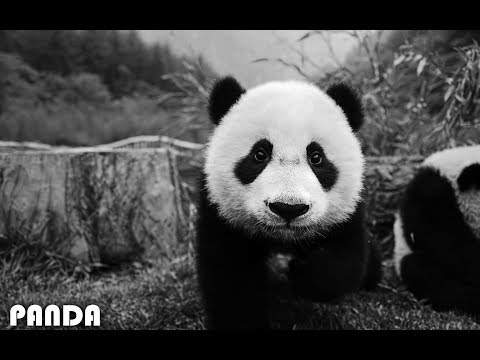

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5vZU8nmoAAs', width=640, height=480)

## Introducing pandas while analysing experimental data.

The experiments were run on several mathematical models and the output data is organized as follows:
- main folder contains data in subfolders for specified experimental parameters settings
- every subfolder contains 10 result folders for single experiment 
- every result folder for single experiment contains 5 files (Solution0.csv, Solution1.csv, ...)

### Loading the data from csv

imports

In [2]:
import pandas as pd
import os

read_csv(path)

In [3]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/01',"Solution0.csv")
df = pd.read_csv(path)

show whole table (DataFrame)

In [4]:
df

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup
0,0,IP0,11,0.796,0.185,3.0,1.0,0.0,2.0,0.0


get data from one column

In [5]:
df['Model']

0    IP0
Name: Model, dtype: object

series of data - Series

In [6]:
type(df['Model'])

pandas.core.series.Series

**Add a column**

In [7]:
df['Exp id'] = 0
df

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id
0,0,IP0,11,0.796,0.185,3.0,1.0,0.0,2.0,0.0,0


**Remove a column / selection of columns**

In [8]:
da = df[['Model', 'Time', 'Objective Function']]
da

,Model,Time,Objective Function
0,IP0,0.796,3.0


In [9]:
db = df.loc[:,'Model':'Objective Function'] # row,columns + slicing
db

,Model,Num Gene,Time,TimeIP,Objective Function
0,IP0,11,0.796,0.185,3.0


In [10]:
dc = df.iloc[:,2:5] # row,columns + slicing
dc

,Num Gene,Time,TimeIP
0,11,0.796,0.185


All files have the same format we want to combine them

In [11]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/02',"Solution0.csv") #same model in different experiment folder
df1 = pd.read_csv(path)
df1

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup
0,0,IP0,3,0.128,0.029,1.0,0.0,1.0,0.0,0.0


In [12]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/02',"Solution1.csv") #same experiment, different model
df2 = pd.read_csv(path)
df2

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup
0,0,IP1,3,0.026,0.001,1.0,0.0,1.0,0.0,0


**concat DataFrames**

In [13]:
dflist = [df1,df2]
pd.concat(dflist, axis=0, ignore_index=True)

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup
0,0,IP0,3,0.128,0.029,1.0,0.0,1.0,0.0,0.0
1,0,IP1,3,0.026,0.001,1.0,0.0,1.0,0.0,0.0


# Exercise 1

Download all experimental data in one DataFrame. 

Add 'Exp id' column to number all experiments (5 model results from one subfolder)

In [14]:
models = 5
list1=os.listdir(os.path.join(os.getcwd(),'SIM'))
excount = 0
dflist=[]

for dir1 in list1:
    list2=os.listdir(os.path.join(os.getcwd(),'SIM',dir1))

    exlist = []
    for dir2 in list2:
        data = []

        for i in range(models):
            temp = pd.read_csv(os.path.join(os.getcwd(),'SIM',dir1,dir2,"Solution"+str(i)+".csv"))
            data.append(temp)

        if not data==[]:
            ex = pd.concat(data, axis=0, ignore_index=True) # dataframe for one exp
            ex['Exp id'] = excount
            excount += 1
            exlist.append(ex)
            if "_05_" in dir1:
                ex['Species no'] = 5
            if "_10_" in dir1:
                ex['Species no'] = 10
            if "_15_" in dir1:
                ex['Species no'] = 15
            if "_20_" in dir1:
                ex['Species no'] = 20
            if "_25_" in dir1:
                ex['Species no'] = 25
            if "_30_" in dir1:
                ex['Species no'] = 30
            if "_35_" in dir1:
                ex['Species no'] = 35
            if "_40_" in dir1:
                ex['Species no'] = 40
            if "_45_" in dir1:
                ex['Species no'] = 45
            if "_50_" in dir1:
                ex['Species no'] = 50
            
        
    if not exlist==[]:
        df = pd.concat(exlist, axis=0, ignore_index=True) # dataframe for all experiment with the same simulation settings
        dflist.append(df)

dd = pd.concat(dflist, axis=0, ignore_index=True)  #total dataframe
dd

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
1,0,IP1,122,4.807,0.055,16.0,5.0,4.0,7.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
4,0,IP4,122,4.824,0.051,16.0,5.0,4.0,7.0,0.0,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,IP0,28,8.502,1.035,4.0,1.0,0.0,3.0,0.0,99,25
496,0,IP1,28,0.271,0.003,4.0,1.0,0.0,3.0,0.0,99,25
497,0,IP2,28,0.272,0.003,4.0,1.0,0.0,3.0,0.0,99,25
498,0,IP3,28,8.362,1.064,4.0,1.0,0.0,3.0,0.0,99,25


## Procesing the data in DataFrames

In [15]:
dd.head()

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
1,0,IP1,122,4.807,0.055,16.0,5.0,4.0,7.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
4,0,IP4,122,4.824,0.051,16.0,5.0,4.0,7.0,0.0,0,50


**Selecting values with parameter**

In [16]:
da = dd[dd.Time > 30]
da.head()

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
5,0,IP0,61,61.330,4.200,9.0,2.0,0.0,7.0,0.0,1,50
8,0,IP3,61,62.157,4.023,9.0,2.0,0.0,7.0,0.0,1,50
15,0,IP0,134,683.613,357.470,35.0,4.0,8.0,22.0,1.0,3,50


In [17]:
mymask = (dd.Time > 30) & (dd.TimeIP < 2)
mymask.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [18]:
da = dd[mymask]
da

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
30,0,IP0,45,52.048,1.625,11.0,3.0,2.0,6.0,0.0,6,50
33,0,IP3,45,52.612,1.638,11.0,3.0,2.0,6.0,0.0,6,50
270,0,IP0,43,32.340,1.674,12.0,4.0,5.0,3.0,0.0,54,45
273,0,IP3,43,32.252,1.672,12.0,4.0,5.0,3.0,0.0,54,45
280,0,IP0,46,31.948,1.634,7.0,2.0,2.0,3.0,0.0,56,45
283,0,IP3,46,31.554,1.653,7.0,2.0,2.0,3.0,0.0,56,45


Negation of a mask

In [19]:
da = dd[~mymask]
da.head()

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
1,0,IP1,122,4.807,0.055,16.0,5.0,4.0,7.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
4,0,IP4,122,4.824,0.051,16.0,5.0,4.0,7.0,0.0,0,50


**isin()** command

In [20]:
a = ['2.0']
da = dd[dd['Objective Function'].isin(a)]
da

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no


# Exercise 2

Obtain data only for IP0 and IP2 models.

In [32]:
model_list = ['IP0', 'IP2']
d2 = dd[dd['Model'].isin(model_list)]
print(len(d2))
d2

200


,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
5,0,IP0,61,61.330,4.200,9.0,2.0,0.0,7.0,0.0,1,50
7,0,IP2,61,1.354,0.011,9.0,2.0,2.0,5.0,0.0,1,50
10,0,IP0,2,0.204,0.002,1.0,1.0,0.0,0.0,0.0,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
487,0,IP2,23,0.145,0.001,2.0,0.0,1.0,1.0,0.0,97,25
490,0,IP0,8,1.738,0.070,2.0,0.0,2.0,0.0,0.0,98,25
492,0,IP2,8,0.123,0.001,2.0,0.0,2.0,0.0,0.0,98,25
495,0,IP0,28,8.502,1.035,4.0,1.0,0.0,3.0,0.0,99,25


# Procesing the data in DataFrames - functions

In [23]:
dd.mean()

<ipython-input-23-bd2241ceb999>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dd.mean()


Unnamed: 0             0.000000
Num Gene              33.870000
Time                  14.443476
TimeIP                 2.417024
Objective Function     7.586000
Num Duplication        2.278000
Num Loss               1.768000
Num Coal at Spe        3.468000
Num Coal at Dup        0.072000
Exp id                49.500000
Species no            27.500000
dtype: float64

In [24]:
dd.sum()

Unnamed: 0                                                            0
Model                 IP0IP1IP2IP3IP4IP0IP1IP2IP3IP4IP0IP1IP2IP3IP4I...
Num Gene                                                          16935
Time                                                           7221.738
TimeIP                                                         1208.512
Objective Function                                               3793.0
Num Duplication                                                  1139.0
Num Loss                                                          884.0
Num Coal at Spe                                                  1734.0
Num Coal at Dup                                                    36.0
Exp id                                                            24750
Species no                                                        13750
dtype: object

In [25]:
dd['Time'].sum()

7221.738

In [26]:
len(dd)

500

In [27]:
da = dd[['Time', 'TimeIP']].apply(lambda x: 'sum=' + str(sum(x)), axis=1)
da.head()

0    sum=243.63400000000001
1                 sum=4.862
2                 sum=4.828
3               sum=238.692
4                 sum=4.875
dtype: object

In [28]:
dd.head()

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
1,0,IP1,122,4.807,0.055,16.0,5.0,4.0,7.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
4,0,IP4,122,4.824,0.051,16.0,5.0,4.0,7.0,0.0,0,50


**groupby**

In [29]:
t = dd.groupby(['Model'])['Time'].agg('sum')
t

Model
IP0    3580.440
IP1     102.395
IP2     101.322
IP3    3333.967
IP4     103.614
Name: Time, dtype: float64

In [30]:
dd.head(7)

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
1,0,IP1,122,4.807,0.055,16.0,5.0,4.0,7.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
4,0,IP4,122,4.824,0.051,16.0,5.0,4.0,7.0,0.0,0,50
5,0,IP0,61,61.330,4.200,9.0,2.0,0.0,7.0,0.0,1,50
6,0,IP1,61,1.326,0.012,9.0,2.0,2.0,5.0,0.0,1,50


**query**

In [31]:
col_n = 'TimeIP'
my_size = '0.006'
pom = dd.query(f"{col_n } != '{my_size}'")
pom.head()

,Unnamed: 0,Model,Num Gene,Time,TimeIP,Objective Function,Num Duplication,Num Loss,Num Coal at Spe,Num Coal at Dup,Exp id,Species no
0,0,IP0,122,222.794,20.840,16.0,5.0,2.0,9.0,0.0,0,50
1,0,IP1,122,4.807,0.055,16.0,5.0,4.0,7.0,0.0,0,50
2,0,IP2,122,4.779,0.049,16.0,5.0,4.0,7.0,0.0,0,50
3,0,IP3,122,220.252,18.440,16.0,5.0,2.0,9.0,0.0,0,50
4,0,IP4,122,4.824,0.051,16.0,5.0,4.0,7.0,0.0,0,50


# Exercise 3

For data from exercise 2, remove all data where 'Objective Function' for 'IP0' and 'IP2' matches.

In [41]:
t3_1 = d2.groupby(['Num Gene'])['Objective Function'].agg(['min','max'])
t3_2 = t3_1.loc[t3_1['min'] != t3_1['max']]
included_index = list(t3_2.index)
d3 = d2[d2['Num Gene'].isin(included_index)]
len(d3)

142

# Exercise 4

Find the greatest mismatch in results for model 'IP0' and 'IP2' (use data from Ex 3)


In [44]:
t3 = d3.groupby(['Num Gene'])['Objective Function'].agg(['min','max'])
t3['mismatch'] = abs(t3['max'] - t3['min'])
num_gene_with_max_mismatch = t3['mismatch'].idxmax()
print("Number of gene with the highest mismatch between model 'IP0' and 'IP2': " + str(num_gene_with_max_mismatch))

Number of gene with the highest mismatch between model 'IP0' and 'IP2': 31


# And now PICTURES

In [ ]:
bp = dd.boxplot(column=['Time'], by=['Species no','Model'],grid=False,
                patch_artist = True, return_type='both',figsize=(15, 7))

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

bp = dd.boxplot(column=['Time'], by=['Species no','Model'],grid=False,
                patch_artist = True, return_type='both',figsize=(15, 7))

colors = ['b', 'y', 'm', 'r', 'g' ]
for row_key, (ax,row) in bp.iteritems():
    ax.set_xlabel('Number of Species')
    ax.set_ylabel('Time')
    ax.set_title('')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(labels)):
        labels[i] = ''
    lista = [(2,5),(7,10),(12,15),(17,20),(22,25),
            (27,30),(32,35),(37,40),(42,45),(47,50)]
    for a,b in lista:
        labels[a] = str(b)    
    ax.set_xticklabels(labels)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i % 5])
        
        
a_patch = mpatches.Patch(color='b', label='ILP model')
b_patch = mpatches.Patch(color='y', label='ILP-C1 model')
c_patch = mpatches.Patch(color='m', label='ILP-C2 model')
d_patch = mpatches.Patch(color='r', label='ILP-C3 model')
e_patch = mpatches.Patch(color='g', label='ILP-C4 model')
plt.legend(loc='upper left',handles=[a_patch, b_patch,c_patch, d_patch,e_patch])
plt.suptitle("")
plt.rcParams.update({'font.size': 15})
plt.savefig('Fig.pdf')
plt.show()

**DataFrame metl**

In [ ]:
import seaborn as sns

# merging columns
dd_a = dd.loc[dd['Model'] == "IP0"]
dd_a = dd_a[['Time','Species no','Exp id']]
dd_a = dd_a.rename(columns={'Time': 'M0'})

dd_b = dd.loc[dd['Model'] == "IP3"]
dd_b = dd_b[['Time','Species no','Exp id']]
dd_b = dd_b.rename(columns={'Time': 'M3'})

ddf = dd_a.merge(dd_b, on='Exp id')
ddf = ddf[['M0','Species no_x','M3']]
ddf = ddf.rename(columns={'Species no_x': 'Species no'})

# main command
dfl = ddf.melt(id_vars=['Species no'], value_vars=['M0', 'M3'])

plt.figure(figsize=(12,8))
bp = sns.boxplot(x='Species no', y='value', data=dfl, showfliers=False, 
                 color='tomato', hue='variable')
bp.set(xlabel='Number of Species', ylabel='Time (seconds)')
plt.legend(title='Model', loc='upper left')  #, labels=['M0', 'M3'] to set labels


plt.rcParams.update({'font.size': 22})
plt.savefig('Fig03.eps')

plt.show()
